## Un dataset taillé pour la reconnaissance binaire

 ## Librairies

 - La librairie `cv2` permet la détection automatique de visages, entre autres.

 - La librairie `pickle` permet de sauvegarder vos modèles une fois entraînés, et de les recharger pour pouvoir les utiliser.

In [2]:
import os

import cv2
import pickle

import numpy as np

import matplotlib.pyplot as plt


 ## Création du dataset

À la différence du dataset précédent, les viages ne sont plus identifiés par leur noms mais par leur classe. La classe `1` concerne les membres admis et la classe `0` ceux qui ne sont pas admis. **À chaque fois que vos relancez le code ci-dessous, votre caméra capture 10 images de la personne qui se trouve devant vootre PC et ajoute ces dernières à votre dataset (Vous aurez au préalable à renseigner sa classe)**


 Le code effectue les opérations suivantes. Premièrement, on lit le flux vidéo de votre caméra et on détecte automatiquement les visages dans chaque image de ce flux en utilisant le **classificateur en cascade de Haar (Haar cascade classifier)** de la librairie `OpenCV`.

 Plus précisément, tant que la variable `ret` est vraie, indiquant que le flux vidéo est lu correctement, pour chaque image capturée par la caméras, on effectue les opérations suivantes:
 1. on convertit l'image en niveaux de gris;
 2. on détecte les coordonnées du visage en utilisant le classificateur en cascade de Haar;
 3. on recadre la région du visage et la redimensionne en $50 \times 50$ pixels;
 4. on ajoute l'image du visage redimensionné à la liste `donnees_visage`, à chaque intervalle de $10$ images.

 Une fois que $10$ images de votre visage ont été collecteés, ou si l'utilisateur appuye sur la touche `Esc`, on met fin à la boucle et enregistre les images dans la liste `donnees_visage` sous forme d'un tableau `NumPy`.



 Par la suite, l'existence des fichiers `targets.pkl` et `features.pkl` est vérifiée. S'ils n'existent pas, de nouveaux fichiers sont créés, la variable `admission_state` renseigne la classe `y` des `x` photos enregistées, les targets (classe des différents visages) sont enregistrées dans  `targets.pkl` et les données de visage (features) sont enregistrées dans `features.pkl`. Si ces fichiers existent déjà, le code charge les données existantes, ajoute les nouvelles données de visage et classe, et les réenregistre le tout dans les fichiers respectifs.

In [2]:

# ================== #
# Variables globales #
# ================== #
if not os.path.exists("data_binary_classification"):
    os.mkdir("data_binary_classification")         # création d'un répertoire data

nb_images_collectees = 30    # nombre d'image que vous voulez collecter

donnees_visage = []

camera = cv2.VideoCapture(0) # 0 pour 'built-in' caméra, 1 pour caméra externe

cascade_visage = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ====================================== #
# Capture des data: images et classes    #
# ====================================== #

ret = True
i = 0

while(ret):
    ret, frame = camera.read()
    
    if ret == True:
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        coordonnees_visage = cascade_visage.detectMultiScale(gris, 1.3, 4)

        for (a, b, w, h) in coordonnees_visage:
            features = frame[b:b+h, a:a+w, :]
            visages_redimensionnes = cv2.resize(features, (50, 50))
            
            if i % 10 == 0 and len(donnees_visage) < nb_images_collectees:
                donnees_visage.append(visages_redimensionnes)
                
            cv2.rectangle(frame, (a, b), (a+w, b+h), (255, 0, 0), 2)
            
        i += 1

        cv2.imshow('Visages', frame)

        if cv2.waitKey(1) == 27 or len(donnees_visage) >= nb_images_collectees:
            break
    else:
        print('erreur')
        break

cv2.destroyAllWindows()
camera.release()

donnees_visage = np.asarray(donnees_visage)

# ======================================= #
# Enregistrement des data: nom et images  #
# ======================================= #
if 'targets.pkl' not in os.listdir('data_binary_classification/'):
    admission_state = 1
    targets = [admission_state] * nb_images_collectees
    with open('data_binary_classification/targets.pkl', 'wb') as file:
        pickle.dump(targets, file) # Comme le fichier n'existe pas, on part du principe que les visages font partie de la classe admis
else:
    choix_admission = input("Voulez-vous ajouter ces visages en tant qu'admis? (o/n): ")
    if choix_admission == 'o':
        with open('data_binary_classification/targets.pkl', 'rb') as file:
            targets = pickle.load(file)
        admission_state = 1
        targets = targets + [admission_state] * nb_images_collectees
        with open('data_binary_classification/targets.pkl', 'wb') as file:
            pickle.dump(targets, file)
    else:
        admission_state = 0
        with open('data_binary_classification/targets.pkl', 'rb') as file:
            targets = pickle.load(file)
        targets = targets + [admission_state] * nb_images_collectees
        with open('data_binary_classification/targets.pkl', 'wb') as file:
            pickle.dump(targets, file)

if 'features.pkl' not in os.listdir('data_binary_classification/'):
    with open('data_binary_classification/features.pkl', 'wb') as w:
        pickle.dump(donnees_visage, w)
else:
    with open('data_binary_classification/features.pkl', 'rb') as w:
        features = pickle.load(w)
    features = np.append(features, donnees_visage, axis=0)
    with open('data_binary_classification/features.pkl', 'wb') as w:
        pickle.dump(features, w)
    

cv2.destroyAllWindows()

 ## Visualisation du dataset

 Le instructions suivantes permettent de loader votre dataset et de comprendre comment sont stockées les data.

 Prêtez attention aux types de vos data, en particulier à la dimension de vos images, etc.

In [3]:
with open("data_binary_classification/targets.pkl", "rb") as fh:
    targets = pickle.load(fh)


In [4]:
targets

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
with open("data_binary_classification/features.pkl", "rb") as fh:
    features = pickle.load(fh)


In [6]:
features.shape


(60, 50, 50, 3)

In [13]:
features.shape


(60, 50, 50, 3)

In [8]:
sample_1 = features[0]
sample_1.shape

(50, 50, 3)

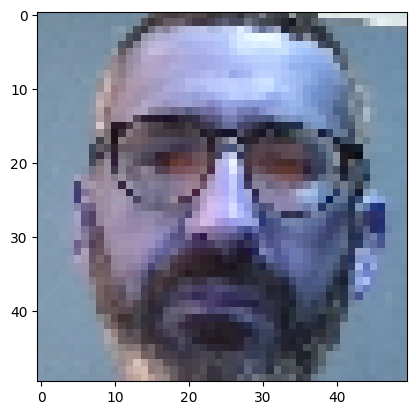

In [9]:
plt.imshow(sample_1, interpolation="nearest")


In [10]:
sample_2 = features[5]
sample_2.shape


(50, 50, 3)

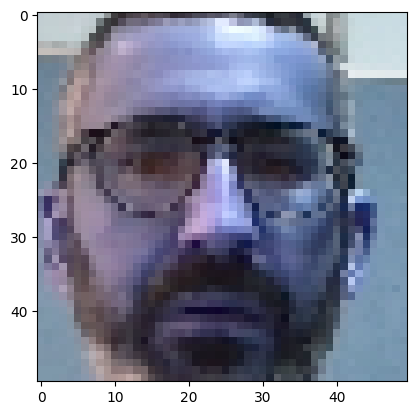

In [11]:
plt.imshow(sample_2, interpolation="nearest")




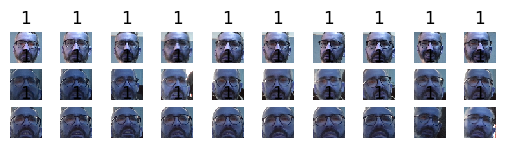

In [12]:
# afficher toute les images avec leur classe associée

for i in range(nb_images_collectees):
    plt.subplot(10, 10, i+1)
    plt.imshow(features[i], interpolation="nearest")
    plt.title(targets[i])
    plt.axis("off")
plt.show()